In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.000,147.042,85.854,0.700,74.375,149.750,218.825,296.400
radio,200.000,23.264,14.847,0.000,9.975,22.900,36.525,49.600
newspaper,200.000,30.554,21.779,0.300,12.750,25.750,45.100,114.000
sales,200.000,14.023,5.217,1.600,10.375,12.900,17.400,27.000


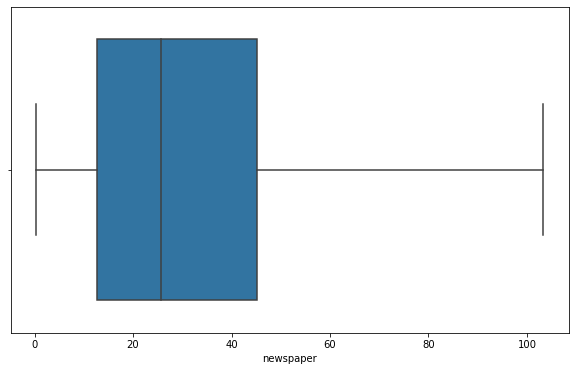

In [5]:
for i in df.select_dtypes([float, int]).columns:
    if i == "newspaper" :
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        alt_sinir = Q1-(1.8*IQR)
        ust_sinir = Q3+(1.8*IQR)
        aykiri_alt = df[i] < alt_sinir
        aykiri_ust = df[i] > ust_sinir
        df[i][aykiri_alt] = alt_sinir
        df[i][aykiri_ust] = ust_sinir
        
sns.boxplot(df["newspaper"], whis=1.8);  

### Train Test Split : 

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

### Metrics : 

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Modelling : 

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.888,0.930
mae,1.291,1.125
mse,2.969,2.064
rmse,1.723,1.437


In [16]:
def val_tahmin(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [17]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

val_tahmin(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.888,0.930
mae,1.291,1.125
mse,2.969,2.064
rmse,1.723,1.437


In [18]:
### Cross Validate train : 

from sklearn.model_selection import cross_validate

model = LinearRegression()

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.864
test_neg_mean_absolute_error       -1.334
test_neg_mean_squared_error        -3.206
test_neg_root_mean_squared_error   -1.719
dtype: float64

In [19]:
### Cross Validate test : 

model = LinearRegression()

scores = cross_validate(model, X_test, y_test, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.705
test_neg_mean_absolute_error       -1.263
test_neg_mean_squared_error        -2.743
test_neg_root_mean_squared_error   -1.520
dtype: float64

### Tahmin : 

In [20]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [25]:
df.iloc[57]

TV          136.200
radio        19.200
newspaper    16.600
sales        13.200
Name: 57, dtype: float64

In [26]:
yeni_veri = [[136.200],[19.200],[16.600]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [27]:
model.predict(yeni_veri)

array([12.77414749])

In [28]:
model = LinearRegression()

scores = cross_validate(model, X, y, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.885
test_neg_mean_absolute_error       -1.302
test_neg_mean_squared_error        -3.060
test_neg_root_mean_squared_error   -1.691
dtype: float64